In [1]:
from math import *
import numpy as np
import sympy as sy

知识重点
--
1. 相对速度+相对加速度
2. 联动速度+联动加速度
3. 速度限制
   
重点题目
-- 
1. 308 相对速度
2. 919 相对速度
3. 365 **相对加速度**
4. 554 **联动⭐⭐**
5. 807 **画图**
6. 1072 **速度限制**
7. 494 **画图**
8. 184 **速度限制+联动⭐**

$$
\vec{v}_Q=\vec{v}_P+\vec{v}_{\frac{Q}{P}}
$$

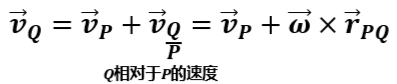

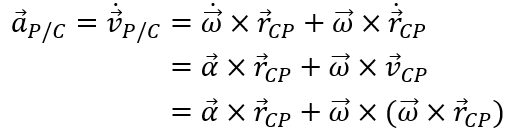

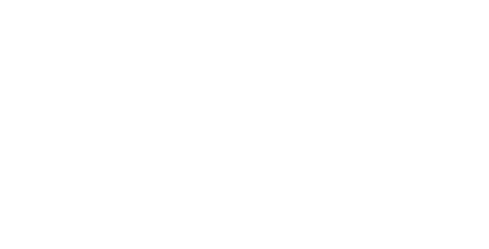

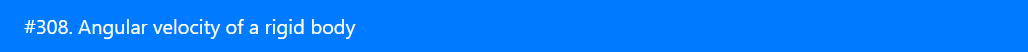

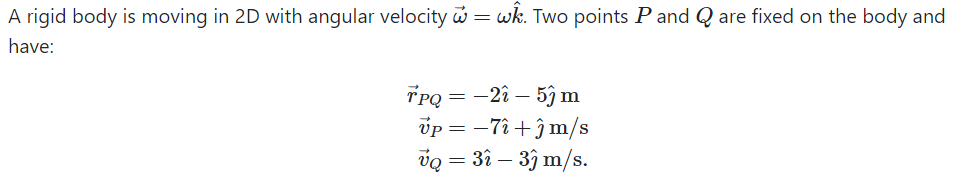

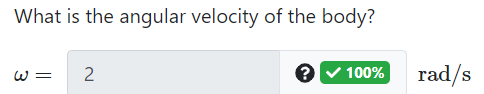

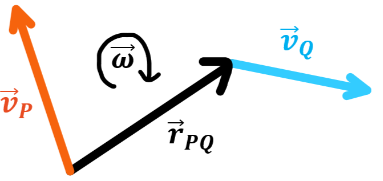

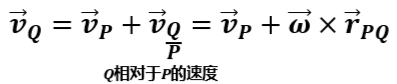

In [2]:
#角速度
rPQ = np.array([-2, -5,  0])
vP = np.array([-7,  1,  0])
vQ = np.array([ 3, -3,  0])

w=sy.S('w')

omega=np.array([0,0,w])
equ1=np.cross(omega,rPQ)
equ2=vQ-vP

sy.solve([equ1-equ2][0],[w])

{w: 2}

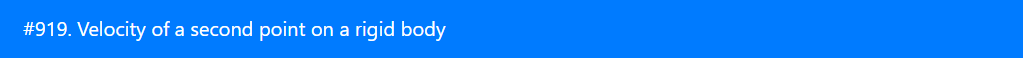

In [3]:
#速度
rPQ = np.array([ 0, -3,  0])
vP = np.array([ 2, -1,  0])
omega = np.array([ 0,  0, -2])

vQ=vP+np.cross(omega,rPQ)
vQ

array([-4, -1,  0])

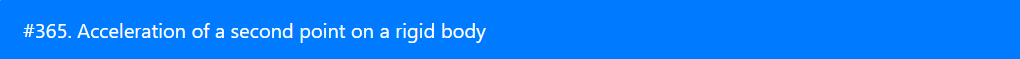

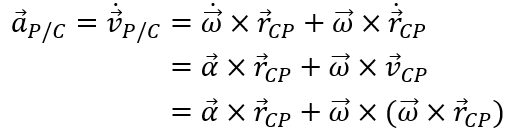

In [4]:
#速度+加速度 ⭐
import numpy as np
from numpy import cross

omega = np.array([0, 0, 0])
alpha = np.array([0, 0, 1])
rPQ = np.array([-3,  0,  0])
aP = np.array([ 2, -1,  0])

w=omega

aQP=cross(alpha,rPQ)+cross(w,cross(w,rPQ))
aQP+aP

array([ 2, -4,  0])

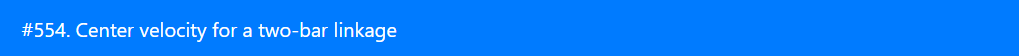

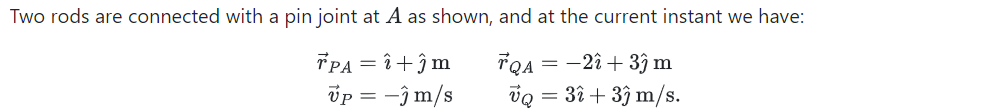

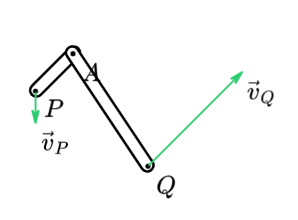

解题思路
---  
  
<div><font size='4'>$v_{A}=v_{P}+v_{\frac{A}{P}}=v_{P}+\vec{\omega_1} \times \vec{r_{PA}}$</font><div> 
<div><font size='4'>$v_{A}=v_{Q}+v_{\frac{A}{Q}}=v_{Q}+\vec{\omega_2} \times \vec{r_{QA}}$</font><div>
    
两条方程，解 $\omega_1,\omega_2$
    
带回解出 $v_A$

In [5]:
#联动 ⭐⭐
from numpy import cross
#######################################复制部分
rPA = np.array([3, 2, 0])
rQA = np.array([ 0, -2,  0])
vP = np.array([2, 1, 0])
vQ = np.array([ 3, -3,  0])
#######################################复制部分

#设A点速度
x,y,z=sy.S('x,y,z')
vA=np.array([x,y,z])

#设两根棒的角速度
w1,w2=sy.S('w1,w2')
omega1=np.array([0,0,w1])
omega2=np.array([0,0,w2])

#计算在杆1中A的速度
vAP=cross(omega1,rPA)
vA1=vAP+vP

#计算在杆2中A的速度
vAQ=cross(omega2,rQA)
vA2=vAQ+vQ

#解方程
equ=vA1-vA2
ans=sy.solve([equ[0],equ[1]],[w1,w2])
w1_value=ans[w1]
w2_value=ans[w2]

#代回
omega1=np.array([0,0,w1_value])
vA=cross(omega1,rPA)+vP
vA.astype(float).flatten()

array([ 4.66666667, -3.        ,  0.        ])

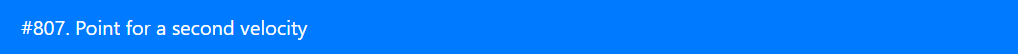

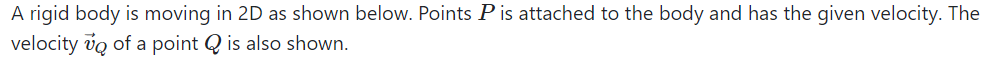

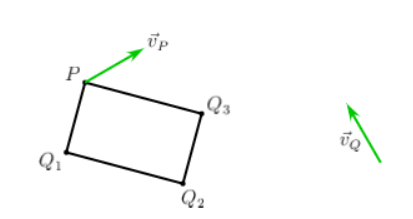

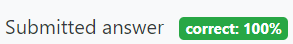

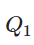

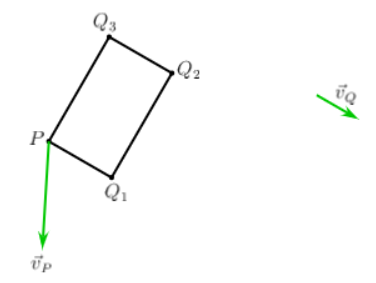

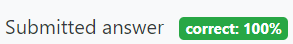

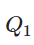

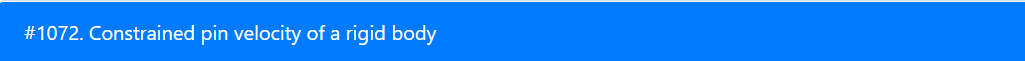

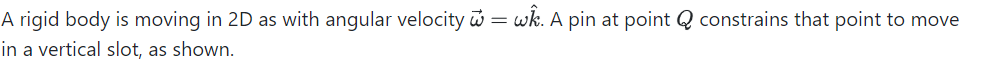

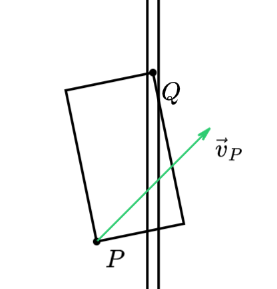

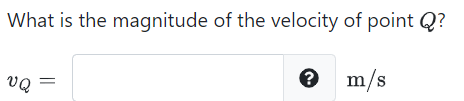

In [11]:
import numpy as np
from numpy import cross

from sympy import *
import sympy as sy
#######################################复制部分
theta = 45
import numpy as np

rPQ = np.array([1, 2, 0])
vP = np.array([ 2, -3,  0])
#######################################复制部分
#单位转化
theta=theta*pi/180

#根据约束条件 设Q点速度的单位向量
Mag_vQ=sy.S('vQ')
nQ=np.array([cos(theta),sin(theta),0])
vQ=Mag_vQ*nQ

#设w角速度计算 P相对Q的速度向量
w=sy.S('w')
rQP=-rPQ
omega=np.array([0,0,w])
vPQ=cross(omega,rQP)

#解方程
vP_Unkonw=vPQ+vQ
equ=vP-vP_Unkonw
equ1=equ[0]
equ2=equ[1]
an=sy.solve([equ1,equ2],[w,Mag_vQ])

vq=an[Mag_vQ]
print(vq.evalf())

-1.88561808316413


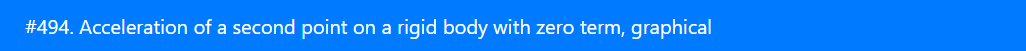

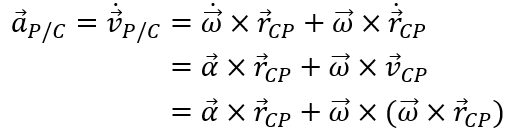

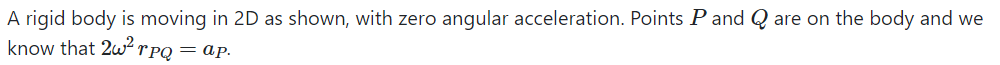

①角加速度=0
--

换句话说 $a_{\frac{Q}{P}}=0.5a_P$
---

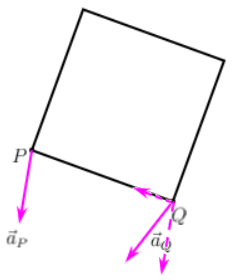

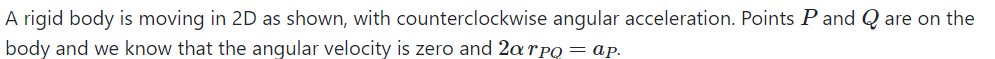

②角速度=0
---

换句话说 $a_{\frac{Q}{P}}=0.5a_P$
---

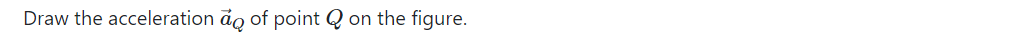

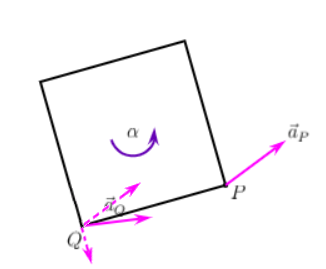

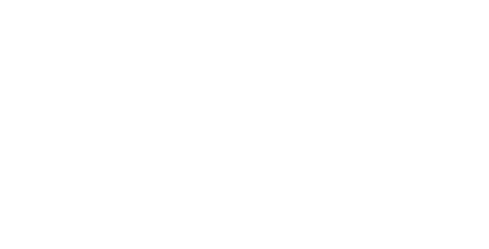

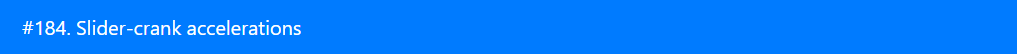

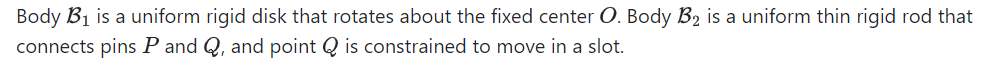

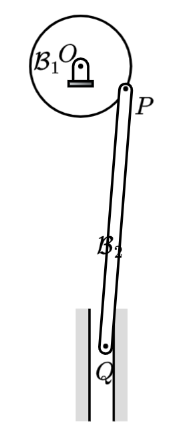

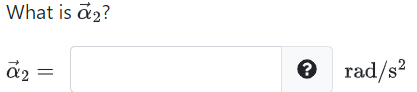

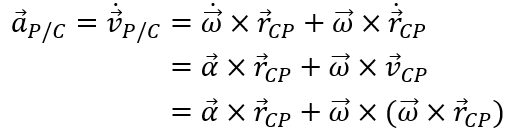

本题思路
---
先计算 $a_P$

In [7]:
#联动+限制⭐⭐
import numpy as np
from numpy import cross

#数据初始化
alpha1=np.array([0,0,0])
alpha2=np.array([0,0,0])
aP=np.array([0,0,0])
aQ=np.array([0,0,0])

#######################################复制部分
rOP = np.array([1, 3, 0])
rPQ = np.array([-12,  -2,   0])
omega1 = np.array([  0,   0, -24])
omega2 = np.array([ 0,  0, -2])
vP = np.array([ 72, -24,   0])
vQ = np.array([68,  0,  0])
alpha2 = np.array([ 0,  0, -3])
#######################################复制部分

#转化
w1=omega1
w2=omega2
rQP=-rPQ

#判断程序，到底TM是那个变量没有
if sum(alpha1) !=0: 
    print('①启动')
    aP=cross(alpha1,rOP)+cross(w1,cross(w1,rOP))
    #因为O点加速度为0，所以给了1的角速度可以直接算出aP

if sum(aQ) !=0:#已知aQ
    print('②启动')
    aPQ=cross(alpha2,rQP)+cross(w2,cross(w2,rQP)) #使用公式计算相对加速度
    aP=aPQ+aQ 

if sum(alpha2) !=0:
    print('③启动')
    #程序③并没有写完！！！！！！！！！！！！！
    
if sum(aP)!=0: #已知aP
    print('④启动')
    #计算alpha2
    #计算aP/Q   P相对于Q的加速度
    alpha2_v=sy.S('alpha_v')
    alpha2=np.array([0,0,alpha2_v])
    aPQ=cross(alpha2,rQP)+cross(w2,cross(w2,rQP))

    #计算aQ     Q点的加速度,利用Q在x轴上的速度限制，即ax=0计算alpha2
    aQ=aP-aPQ
    equx=aQ[0]
    key=int(input('竖直输入0，水平输入1'))       #判断限制条件,如果输错限制条件会报错
    alpha2=sy.solve([aQ[key]],[alpha2_v])[alpha2_v]
    
    #计算alpha1
    alpha1_v=sy.S('alpha1_v')
    alpha1=np.array([0,0,alpha1_v])
    aPO=cross(alpha1,rOP)+cross(w1,cross(w1,rOP))
    equ=aP-aPO
    alpha1=sy.solve([equ[0]],[alpha1_v])[alpha1_v]
print('alpha1=',alpha1)
print('alpha2=',alpha2)
print('aP=    ',aP)
print('aQ=')

③启动
alpha1= [0 0 0]
alpha2= [ 0  0 -3]
aP=     [0 0 0]
aQ=
